# Проект: Анализ оттока клиентов банка "Метанпром"

# Цель проекта:
анализ причин повышенного оттока клиентов банка.

# Задачи проекта:

1. Загрузка и исследование данных.
2. Исследовательский анализ данных.
3. Проверка гипотез.
4. Промежуточный вывод.
5. Приоритезация сегментов. 
6. Формулирование выводов и рекомендаций на их основе. 

1. Загрузка и исследование данных:

1.1 Импорт необходимых библиотек и загрузка данных.

1.2 Приведение наименования столбцов к нижнему регистру и змеиному стилю. 

1.3 Работа с пропусками

1.4 Работа с дубликатами.

1.5 Приведение столбцов к нужному типу данных.

1.6 Работа с выбросами. 

1.7 Кодирование части данных.


2. Исследовательский анализ данных.

2.1 Анализ отточных клиентов через сводную таблицу с мерами центральной тенденции по каждому признаку таблицы.

2.2 Анализ распределения признаков в разрезе оттока/оценке долей оттока.

2.3 Формирование портретов клиентов, которые склонны и не склонны уходу.

3. Проверка гипотез. 

3.1 Проверка первой гипотезы.

3.2 Проверка второй гипотезы. 

4. Формулирование промежуточных выводов на основе анализа.

5. Сегментация и приоритезация сегментов.

5.1 Сегментация.

5.2 Приоритизация сегментов в зависимости от % ушедших клиентов. 

### Загрузка и исследование данных.

#### Импорт необходимых библиотек и загрузка данных.

In [1]:
# Импорт библиотек.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Загрузка данных.

try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')                
except:
    df = pd.read_csv(r"C:\Users\10858\Downloads\bank_scrooge.csv")

In [3]:
# Получим общую информацию о данных.

df.info() 
print('дубликатов', df.duplicated().sum())
print('кол-во пропусков', '\n', df.isna().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
дубликатов 0
кол-во пропусков 
 USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
cred

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


#### Приведение наименования столбцов к нижнему регистру и змеиному стилю.

In [4]:
df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


#### Работа с пропусками.

In [5]:
#делаем оценку только по полям, в которых есть проуски
for i in df.columns:
    na_count=df[i].isna().sum()
    if na_count==0:
        continue
    else:
        df['is_null_column'] = df[i].isnull().astype(int)
        print(f'Распределение доли оттока по пропускам для метрики {i}:')
        print(f'__Общее количество пропусков: {na_count}')
        null_share = round(df[df['is_null_column']==1].churn.mean()*100.0, 1)
        non_null_share = round(df[df['is_null_column']==0].churn.mean()*100.0, 1)
        print(f'__Доля оттока в пропущенных значениях:', null_share, '%')
        print(f'__Доля оттока в НЕ пропущенных значениях:', non_null_share, '%')
df.drop(columns=['is_null_column'], inplace=True)   

Распределение доли оттока по пропускам для метрики age:
__Общее количество пропусков: 26
__Доля оттока в пропущенных значениях: 3.8 %
__Доля оттока в НЕ пропущенных значениях: 18.2 %
Распределение доли оттока по пропускам для метрики balance:
__Общее количество пропусков: 2295
__Доля оттока в пропущенных значениях: 0.6 %
__Доля оттока в НЕ пропущенных значениях: 23.5 %


Анализируем далее каждую метрику более детально


In [6]:
df['is_null_column'] = df['age'].isnull().astype(int)

# по бинарным признакам смотрим среднее для получения доли. Для категориальных - смотрим наиболее частое значение.
agg_dict = {'score': 'mean'
            , 'city': pd.Series.mode
            , 'gender':pd.Series.mode
            , 'balance':'mean'
            , 'equity':'mean'
            , 'products':'mean'
            , 'credit_card':'mean'
            , 'last_activity':'mean'
            , 'est_salary':'mean'
            , 'churn':'mean'}

pd.set_option("display.float_format", "{:.2f}".format)
pvt_temp = pd.pivot_table(df, columns=['is_null_column'], aggfunc=agg_dict)
res_lst = []
for i in range(len(pvt_temp)):
    if type(pvt_temp.iloc[i][0])==str:
        res_lst.append(0)
    else:
        res_lst.append(round((pvt_temp.iloc[i][1]/pvt_temp.iloc[i][0]-1)*100,1))
pvt_temp['delta_prcnt'] = res_lst
pvt_temp

is_null_column,0,1,delta_prcnt
balance,827245.59,1250033.57,51.10
churn,0.18,0.04,-78.90
city,Ярославль,Ярославль,0.00
credit_card,0.68,0.77,13.10
equity,2.63,1.38,-47.40
est_salary,147786.81,178585.20,20.80
gender,М,М,0.00
last_activity,0.52,0.77,47.10
products,1.87,1.35,-28.10
score,848.68,855.15,0.80


Кроме самого оттока видим наиболее сильное отклонение в:

    - Балансе
    - Средней доле пользвателей кредитных карт
    - Среднем количестве баллов собственности 
    - Среднем оценочном доходе
    - В доле признака Последней активности
    - В среднем числе используемых продуктов
Пропуски зависят от данных, то есть относятся к MNAR. Однозначного ответа на определение причины пропусков у нас нет, поэтому отбрасывать или обрабатывать их как-то не стоит. Оставим как есть

Пропусков в поле balance значительно больше. Посмотрим на эту метрику более детально

In [7]:
# закодируем пол клиента бинарным признаком, что бы корректно определять доли
df['is_null_column'] = df['balance'].isnull().astype(int)

# по бинарным признакам смотрим среднее для получения доли. Для категориальных - смотрим наиболее частое значение.
agg_dict = {'score': 'mean'
            , 'city': pd.Series.mode
            , 'gender': pd.Series.mode
            , 'age':'mean'
            , 'equity':'mean'
            , 'products':'mean'
            , 'credit_card':'mean'
            , 'last_activity':'mean'
            , 'est_salary':'mean'
            , 'churn':'mean'}

pd.set_option("display.float_format", "{:.2f}".format)
pvt_temp = pd.pivot_table(df, columns=['is_null_column'], aggfunc=agg_dict)
res_lst = []
for i in range(len(pvt_temp)):
    if type(pvt_temp.iloc[i][0])==str:
        res_lst.append(0)
    else:
        res_lst.append(round((pvt_temp.iloc[i][1]/pvt_temp.iloc[i][0]-1)*100,1))
pvt_temp['delta_prcnt'] = res_lst
pvt_temp

is_null_column,0,1,delta_prcnt
age,42.92,42.09,-1.90
churn,0.23,0.01,-97.60
city,Ярославль,Ярославль,0.00
credit_card,0.64,0.82,27.40
equity,3.40,0.05,-98.50
est_salary,124501.87,226310.21,81.80
gender,Ж,М,0.00
last_activity,0.52,0.55,6.50
products,2.08,1.16,-44.20
score,843.74,865.35,2.60


Кроме самого оттока видим разницу в 
- доле использующих кредитную карту
- среднем количестве баллов в собственности
- оценочной зарплате
- распределению по полу
- среднему количеству используемых продуктов

Пропуски зависят от данных, то есть относятся к MNAR. Однозначного ответа на определение причины пропусков у нас нет, поэтому отбрасывать или обрабатывать их как. то не стоит. Оставим как есть

Ещё возникла гипотеза: учитывая, что клиенты с пустым балансом используют меньше продуктов и имеют меньше баллов собственности - возникла гипотеза, что пустыме значения отражают нулевой баланс на счёте. Пустой баланс - не редкость, поэтому для её проверки посмотрим, отражается ли пустой баланс в датасете через ноль или нет:

In [8]:
len(df[df['balance']==0])

2

Всего 2 клиента с нулевым балансом из всего датасета. Выглядет довольно странно и свидетельствует в пользу того,
что через пустые значения отражают нулевой баланс. Но, наверняка мы это обосновать не можем, поэтому оставляем как есть. Удалим промежуточный столбец

In [9]:
df.drop(columns=['is_null_column'], inplace=True)

 #### Работа с дубликатами.

In [10]:
# Явных дубликатов не выявлено, проверим на неявные дубликаты.

print('Явных дубликатов', df.duplicated(['user_id', 'city', 'gender', 'age']).sum())
print('Дубликатов по клиенту', df.duplicated(['user_id']).sum())

Явных дубликатов 0
Дубликатов по клиенту 73


Видим 50 дублей по user_id. Посмотрим на них более подробно

In [11]:
top_freq_user = df.groupby(['user_id'], as_index=False).agg(
    {'score' : 'count'}).sort_values(by='score', ascending=False).head(1)['user_id'].values[0]
df[df['user_id']==top_freq_user]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3859,191520,773.00,Рыбинск,М,36.00,3,1219918.08,4,1,1,119933.13,1
7931,191520,767.00,Ярославль,М,45.00,0,NaN,1,1,1,880005.05,0


Возможно, какая-то из записей по клиенту устарела, а может это техническая проблема с генерацией user_id на стороне банка. Наверняка мы это проверить не можем. Поэтому удалять их не будем

In [12]:
# проверим неявные дубликаты в других колонках. Неявных дубликатов не выявлено.
display(df['city'].unique())
display(df['gender'].unique())
display(df['credit_card'].unique())
display(df['last_activity'].unique())
display(df['churn'].unique())

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

#### Приведение столбцов к нужному типу данных.

In [13]:
# приводим столбец ['score'] к типу данных 'int'
# приводим столбец ['user_id'] к типу данных 'object'

df[['score']] = df[['score']].astype(int)
df['user_id'] = df['user_id'].astype(object)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  object 
 1   score          10000 non-null  int32  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 898.6+ KB


#### Работа с выбросами.

In [14]:
df.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


In [15]:
# Выясним кол-во клиентов с 0 кол-вом продуктов (не имея продуктов банка, нельзя быть действующим клиентом банка).

df[df['products'] == 0]['user_id'].count()

1

In [16]:
# Удаляем запись т. к. не повлияет на корректность данных.

df = df[df['products']!=0]
df['products'].describe()

count   9999.00
mean       1.87
std        0.79
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

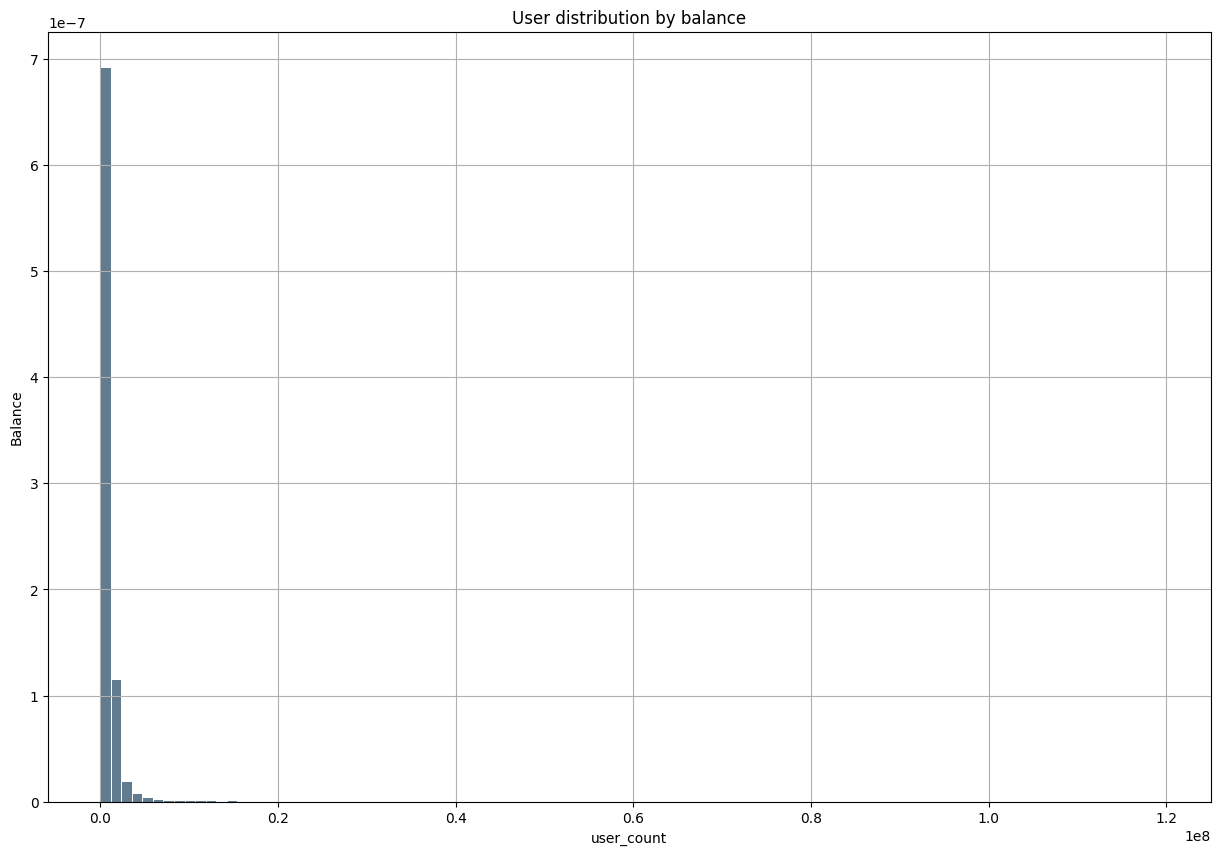

In [17]:
# Проверим выбросы по балансу.
df['balance'].plot.hist(grid=True, bins=100, rwidth=0.9, density=True, 
                   color='#607c8e')

plt.xlabel('user_count')
plt.ylabel('Balance')
plt.title('User distribution by balance')

plt.show()

Для определения границы выбрособ используем z-оценку

In [18]:
# в качестве threshold возьмём значение в 3 стандартных отклонения.
mean = np.mean(df['balance'])
std = np.std(df['balance'])
threshold = 3
tresh_border = 3*std+mean
print(round(tresh_border,2))

6769251.15


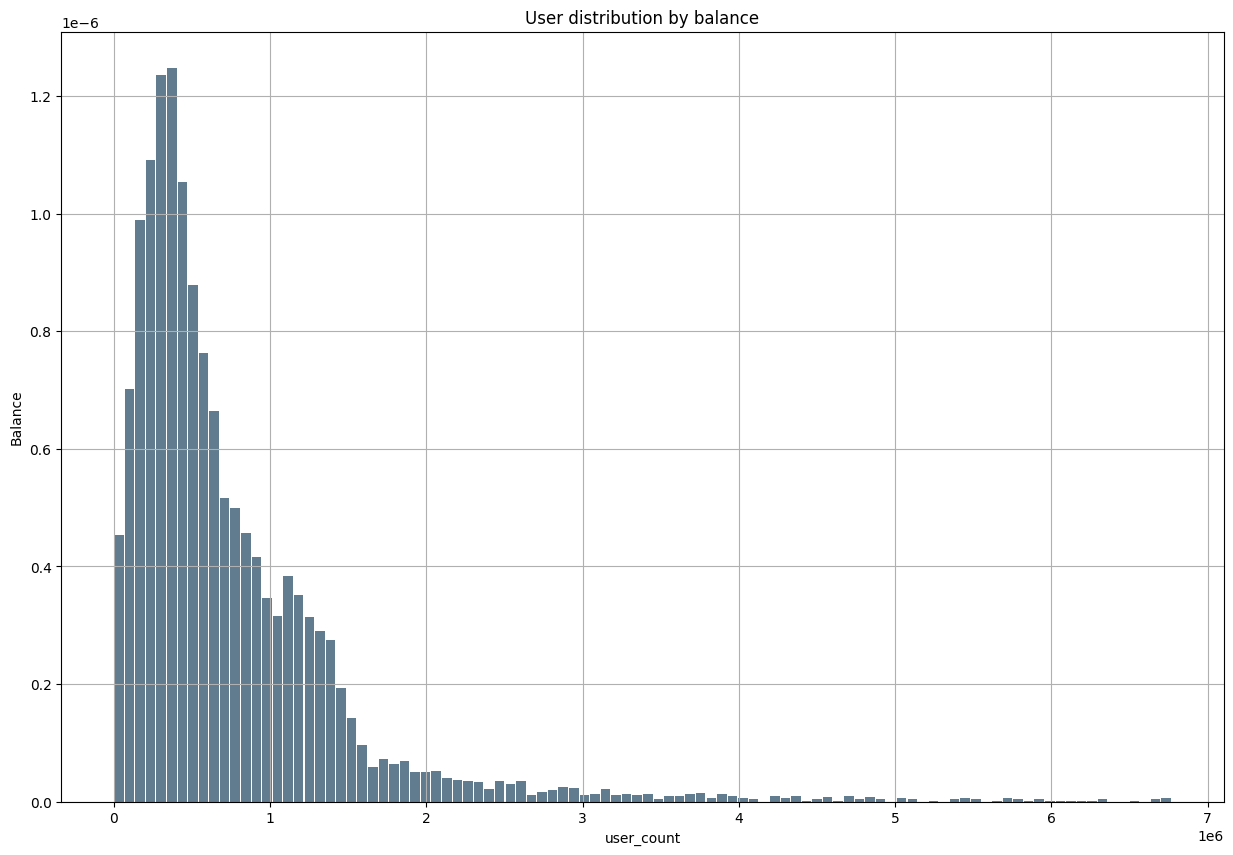

In [19]:
# Проверим распределение без выборосов по балансу.
df['is_outlier'] = df['balance'].apply(lambda x: 1 if x>tresh_border else 0)
df[df['is_outlier']==0]['balance'].plot.hist(grid=True, bins=100, rwidth=0.9, density=True,
                   color='#607c8e')
plt.xlabel('user_count')
plt.ylabel('Balance')
plt.title('User distribution by balance')
plt.show()

Посмотрим, влияют ли выборсы значимо на долю оттока.

In [20]:
with_outl_share = round(df.churn.mean()*100.0, 1)
non_outl_share = round(df[df['is_outlier']==0].churn.mean()*100.0, 1)
print('Доля оттока C выбросами: ', with_outl_share, '%')
print('Доля оттока БЕЗ выбросов: ', non_outl_share, '%')

Доля оттока C выбросами:  18.2 %
Доля оттока БЕЗ выбросов:  18.1 %


In [21]:
#Отклонение незначительное. Удалим выборосы. Не забываем сохранить пустые значения
outl_cnt = len(df[df['is_outlier']==1])
df = df[(df['balance']<tresh_border)|(df['balance'].isna()==True)]
print(f'Удалено {outl_cnt} строк с выборами по балансу')
df.drop(columns=['is_outlier'], inplace=True)

Удалено 38 строк с выборами по балансу


Аналогичным способом обработаем выбросы по est_salary

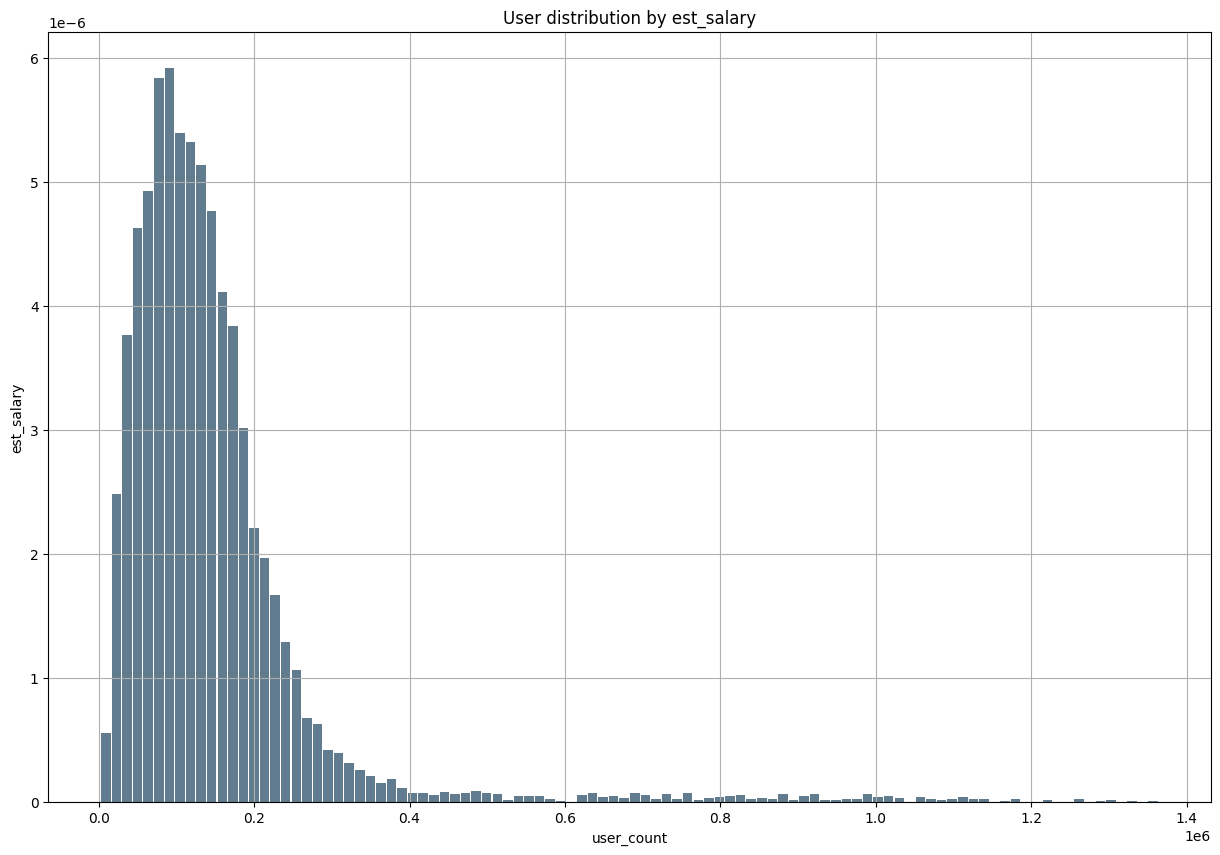

In [22]:
# Проверим выбросы по балансу.
df['est_salary'].plot.hist(grid=True, bins=100, rwidth=0.9, density=True, 
                   color='#607c8e')

plt.xlabel('user_count')
plt.ylabel('est_salary')
plt.title('User distribution by est_salary')

plt.show()

In [23]:
# в качестве threshold возьмём значение в 3 стандартных отклонения.
mean = np.mean(df['est_salary'])
std = np.std(df['est_salary'])
threshold = 3
tresh_border = 3*std+mean
print(round(tresh_border,2))

544976.57


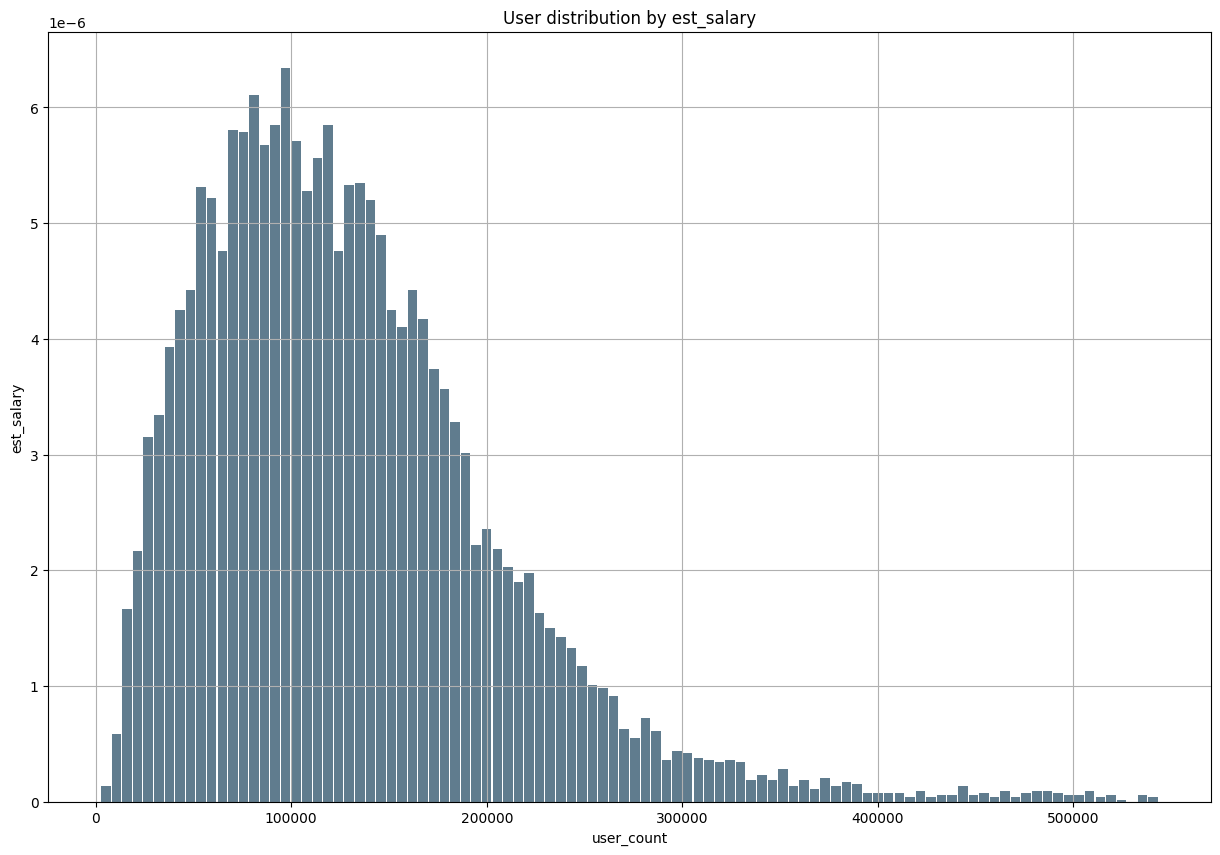

In [24]:
df['is_outlier'] = df['est_salary'].apply(lambda x: 1 if x>tresh_border else 0)
df[df['is_outlier']==0]['est_salary'].plot.hist(grid=True, bins=100, rwidth=0.9, density=True,
                   color='#607c8e')
plt.xlabel('user_count')
plt.ylabel('est_salary')
plt.title('User distribution by est_salary')
plt.show()

In [25]:
with_outl_share = round(df.churn.mean()*100.0, 1)
non_outl_share = round(df[df['is_outlier']==0].churn.mean()*100.0, 1)
print('Доля оттока C выбросами: ', with_outl_share, '%')
print('Доля оттока БЕЗ выбросов: ', non_outl_share, '%')

Доля оттока C выбросами:  18.1 %
Доля оттока БЕЗ выбросов:  18.3 %


In [26]:
#Отклонение незначительное. Удалим выборосы:
outl_cnt = len(df[df['is_outlier']==1])
df = df[df['est_salary']<tresh_border]
print(f'Удалено {outl_cnt} строк с выборами по доходу')
df.drop(columns=['is_outlier'], inplace=True)

Удалено 218 строк с выборами по доходу


#### Кодирование части данных.

In [27]:
# Проверим уникальные значения в столбце ['city']

print(df['city'].unique())

# Проверим уникальные значения в столбце ['gender']

print(df['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


In [28]:
# Для удобства дальнейшего анализа, создадим копии столбцов 'city' и 'gender'

df['city_2'] = df['city']
df['gender_2'] = df['gender']
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_2,gender_2
0,183012,850,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [29]:
# закодируем данные в столбцах ['city_2'] и ['gender_2']

df = pd.get_dummies(df, columns = ['city_2', 'gender_2'])
df = df.rename(columns = ({
        'city_2_Ростов':'Ростов', 
        'city_2_Рыбинск':'Рыбинск',
        'city_2_Ярославль':'Ярославль', 
        'gender_2_Ж':'woman', 
        'gender_2_М':'man'}))
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,woman,man
0,183012,850,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


Вывод: После проведенных действий, данные могут быть использованы для дальнейшего анализа.

### Исследовательский анализ данных.

#### Анализ отточных клиентов через сводную таблицу с мерами центральной тенденции по каждому признаку таблицы.

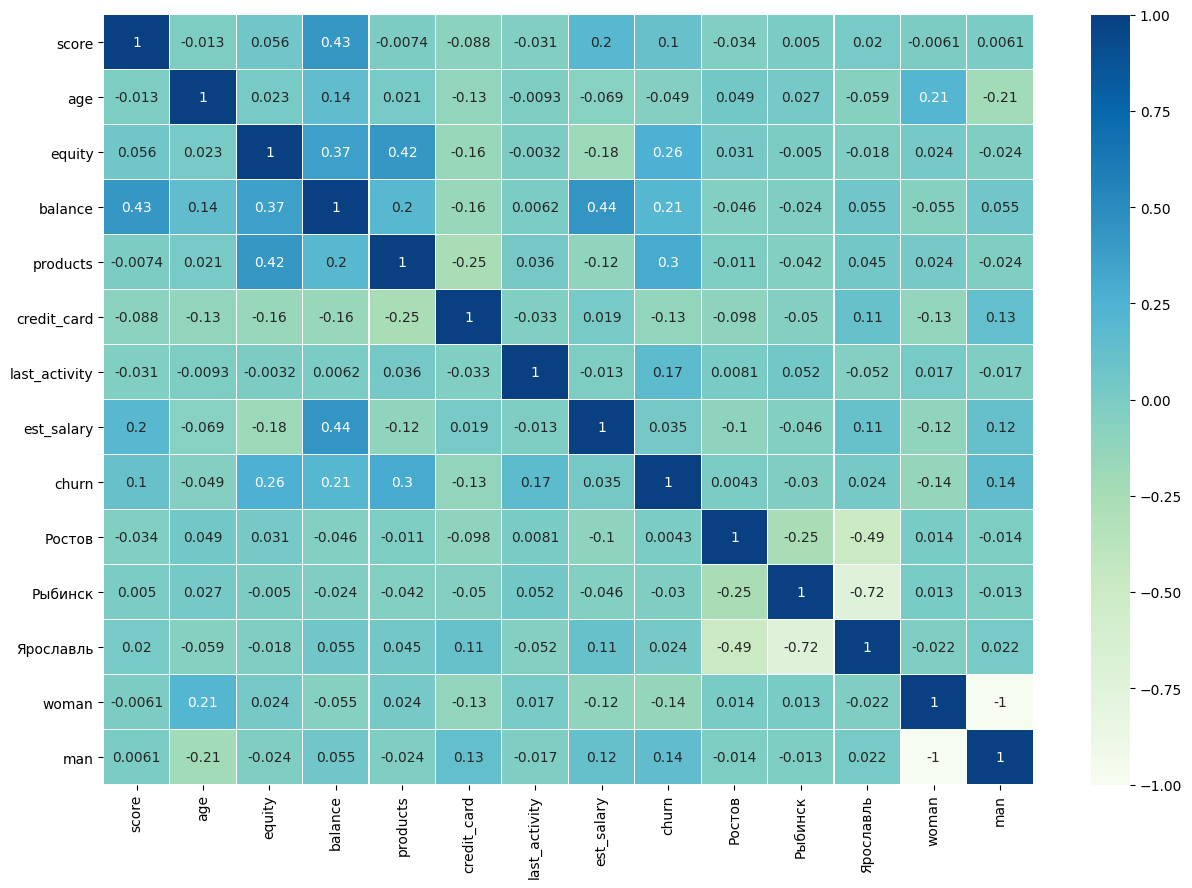

In [30]:
# Построим тепловую карту
sns.heatmap (df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'GnBu', linewidths=0.1)
plt.show()

In [31]:
def cheddok(i):
    if abs(i)<0.3:
        a='Слабая'
    elif abs(i)<=0.5:
        a='Умеренная'  
    elif abs(i)<=0.7:
        a='Заметная'
    elif abs(i)<=0.9:
        a='Высокая' 
    else:
        a = 'Сильная'
    return(a)    
churn_corr = df.corr()[['churn']]
churn_corr.drop('churn')
churn_corr['Corr_strenght'] = churn_corr['churn'].apply(lambda x: cheddok(x))
churn_corr.drop('churn').sort_values(by='Corr_strenght', ascending=False)

,churn,Corr_strenght
score,0.10,Слабая
age,-0.05,Слабая
equity,0.26,Слабая
balance,0.21,Слабая
products,0.30,Слабая
credit_card,-0.13,Слабая
last_activity,0.17,Слабая
est_salary,0.04,Слабая
Ростов,0.00,Слабая
Рыбинск,-0.03,Слабая


Согласно шкале Чеддока наиболее явная коррекляция оттока наблюдается с показателем количества продуктов. Хотя, по Чеддоку она всё равно считается Слабой

#### Анализ распределения признаков в разрезе оттока/оценке долей оттока.

Определим % клиентов в разрезе признака оттока

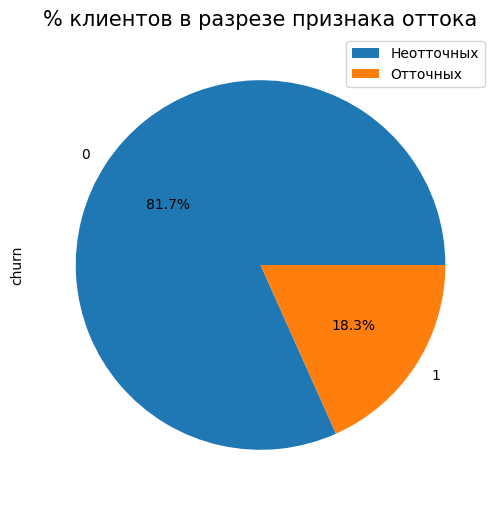

In [32]:
#строим круговую диаграмму
churn_group = df.groupby('churn')['churn'].count()
churn_group.plot(kind = 'pie', y ='churn_cnt', autopct='%1.1f%%', figsize= (6,6),);
plt.title('% клиентов в разрезе признака оттока', fontsize = 15)
plt.legend(['Неотточных', 'Отточных'])
plt.show()

Вывод: отток составляет 18.3 %

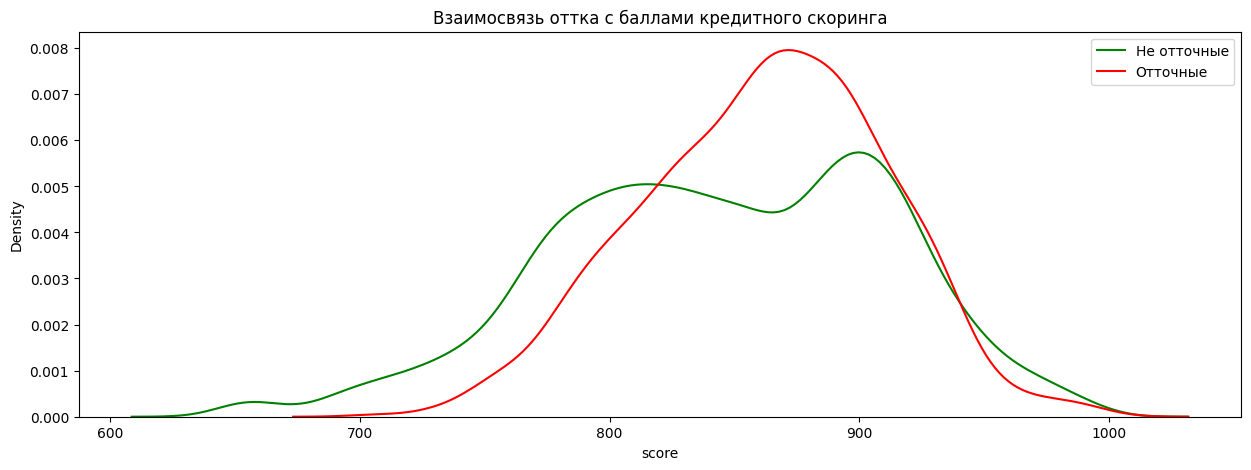

In [33]:
# визуализируем взаимосвязь оттока с баллами кредитног скоринга.
plt.figure(figsize=(15,5))
sns.kdeplot(df[df['churn'] == 0]['score'], common_norm=False, color='green')
sns.kdeplot(df[df['churn'] == 1]['score'], common_norm=False, color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.title('Взаимосвязь оттка с баллами кредитного скоринга')
plt.show()

Вывод: Больший оттток у клиентов с рейтингов от 820 до 940 баллов. Посмотрим на них отдельно

            sum count churn_percent
          churn churn              
score_grp                          
820-940    1130  4703         24.03
940+        295  1762         16.74
0-820       359  3278         10.95


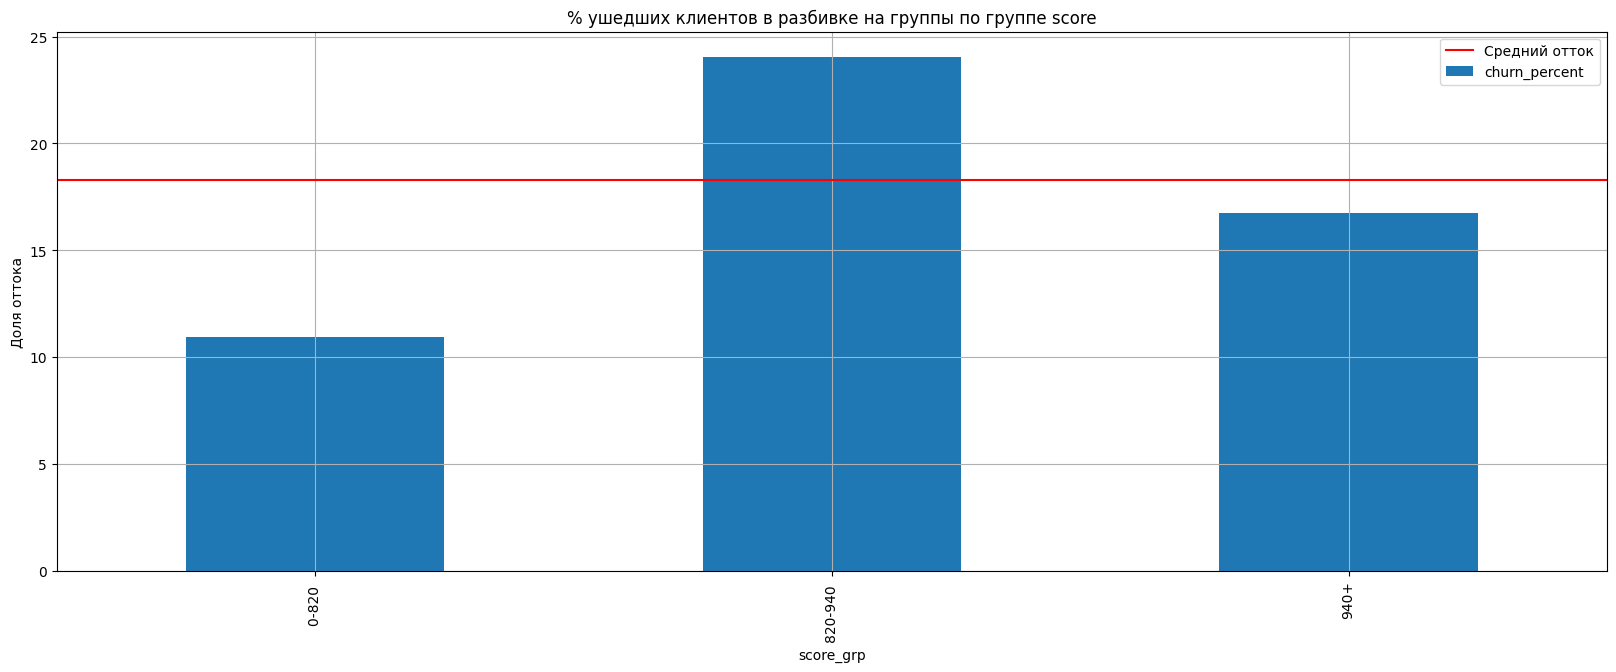

In [34]:
# Рассчитаем % ушедших клиентов в разбивке по ПОЛУ
df['score_grp'] = df['score'].apply(lambda x: '0-820 ' if x<820
                                                else( '820-940 ' if x<910
                                                 else '940+'))
group_churn = df.pivot_table (index = 'score_grp', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке на группы по группе score',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('Доля оттока')
plt.show()

Группа 820 - 940 действительно значительно выделяется по оттоку над остальными

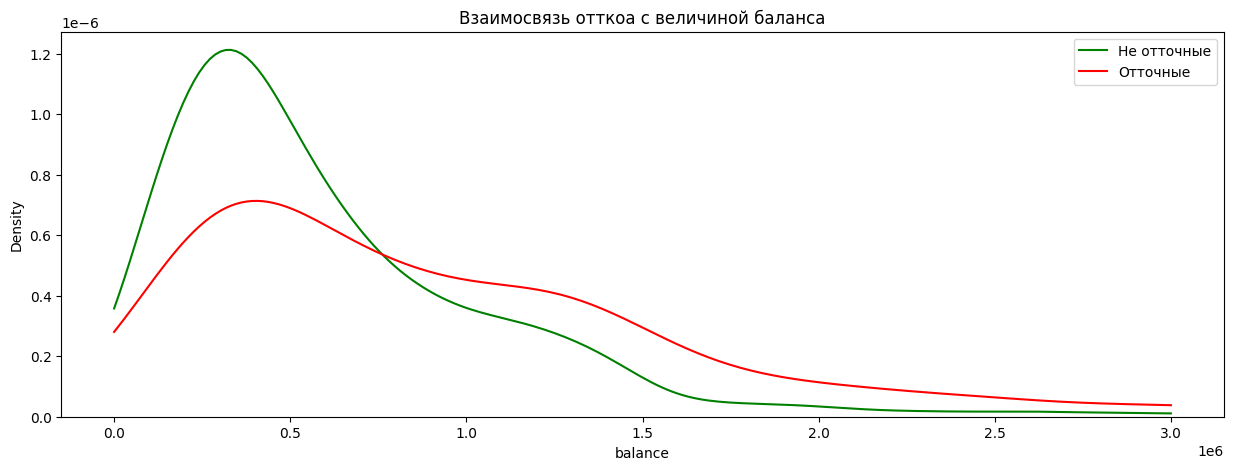

In [35]:
# визуализируем взаимосвязь оттока с балансом.

plt.figure(figsize=(15,5))
sns.kdeplot(df[df['churn'] == 0]['balance'], clip=(0, 3000000), common_norm=False, color='green')
sns.kdeplot(df[df['churn'] == 1]['balance'], clip=(0, 3000000), common_norm=False, color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.title('Взаимосвязь отткоа с величиной баланса')
plt.show()

Вывод: Больший отток у клиентов с балансом выше 900000. Разобьём клиентов на группы по балансу и посмотрим более детально

                sum count churn_percent
              churn churn              
balance_grp                            
1100-2500 тыс   527  1317         40.02
0800-1100 тыс   224   891         25.14
0200-800 тыс    749  4111         18.22
0000-200 тыс    169  1076         15.71
2500+ тыс       115  2348          4.90


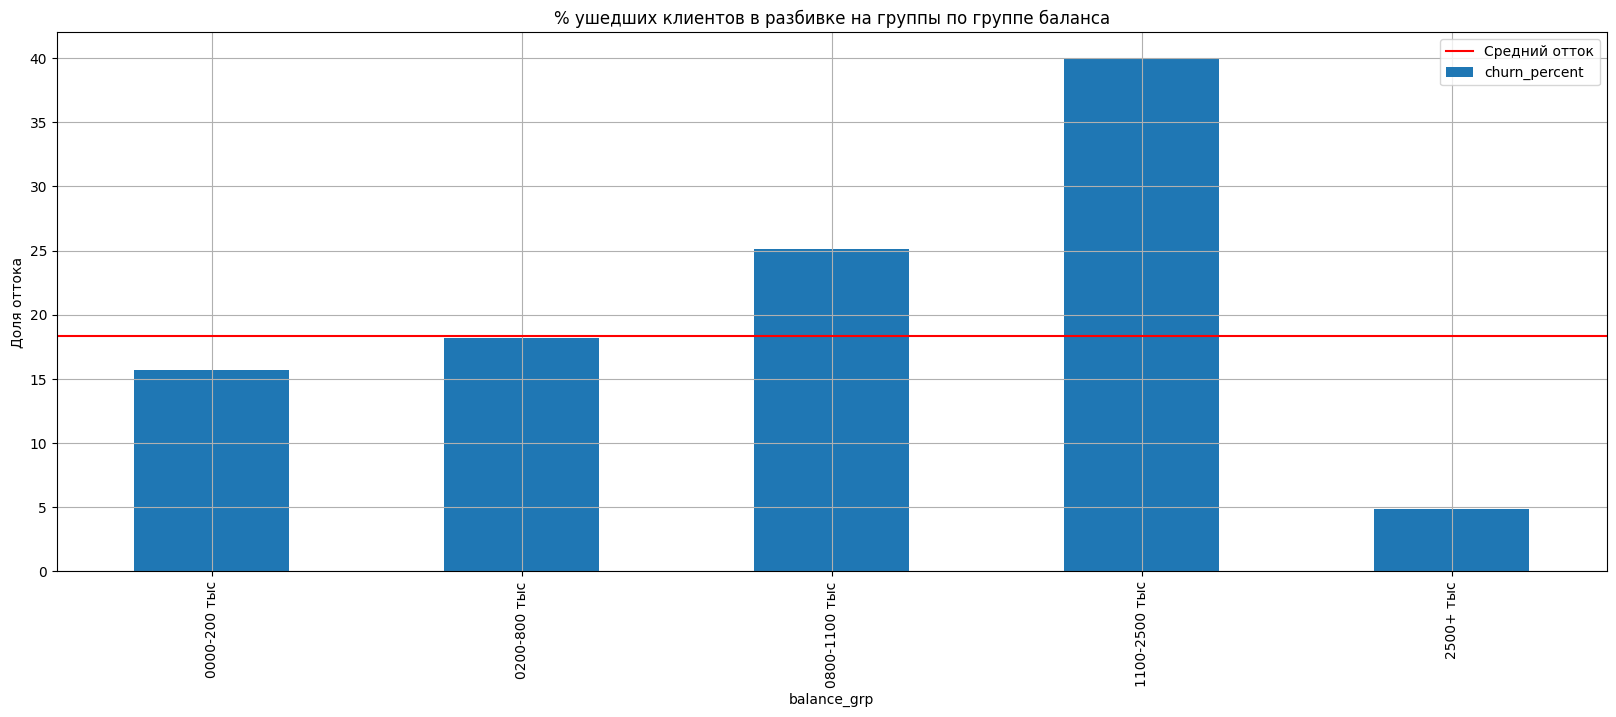

In [36]:
# Рассчитаем % ушедших клиентов в разбивке по ПОЛУ
df['balance_grp'] = df['balance'].apply(lambda x: '0000-200 тыс' if x<200000
                                                else( '0200-800 тыс' if x<800000
                                                else('0800-1100 тыс' if x<1100000 
                                                else('1100-2500 тыс' if x<2500000
                                                 else '2500+ тыс'))))
group_churn = df.pivot_table (index = 'balance_grp', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке на группы по группе баланса',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('Доля оттока')
plt.show()

Группа по балансу 1100 - 2500 тыс очень сильно выбивается из общей динамики. Также отметим для себя группу 800-1100 тыс. Для неё уровень оттока тоже значительно выше, чем в среднем

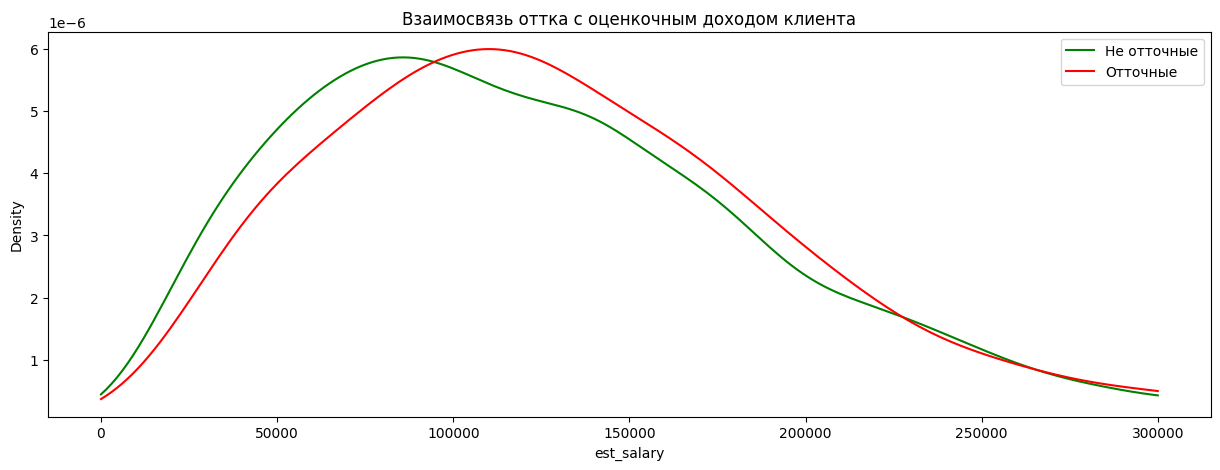

In [37]:
# визуализируем взаимосвязь оттока с оценочным доходом клиента.

plt.figure(figsize=(15,5))
sns.kdeplot(df[df['churn'] == 0]['est_salary'], clip=(0, 300000), common_norm=False, color='green')
sns.kdeplot(df[df['churn'] == 1]['est_salary'], clip=(0, 300000), common_norm=False, color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.title('Взаимосвязь оттка с оценкочным доходом клиента')
plt.show()

Вывод: Больший отток у клиентов с оценочным доходом выше 95000 и меньше 220000. Также посмотрим более детально 

              sum count churn_percent
            churn churn              
salary_grp                           
150-220 тыс   443  2139         20.71
95-150 тыс    571  2875         19.86
250+ тыс      198  1095         18.08
00-95 тыс     572  3634         15.74


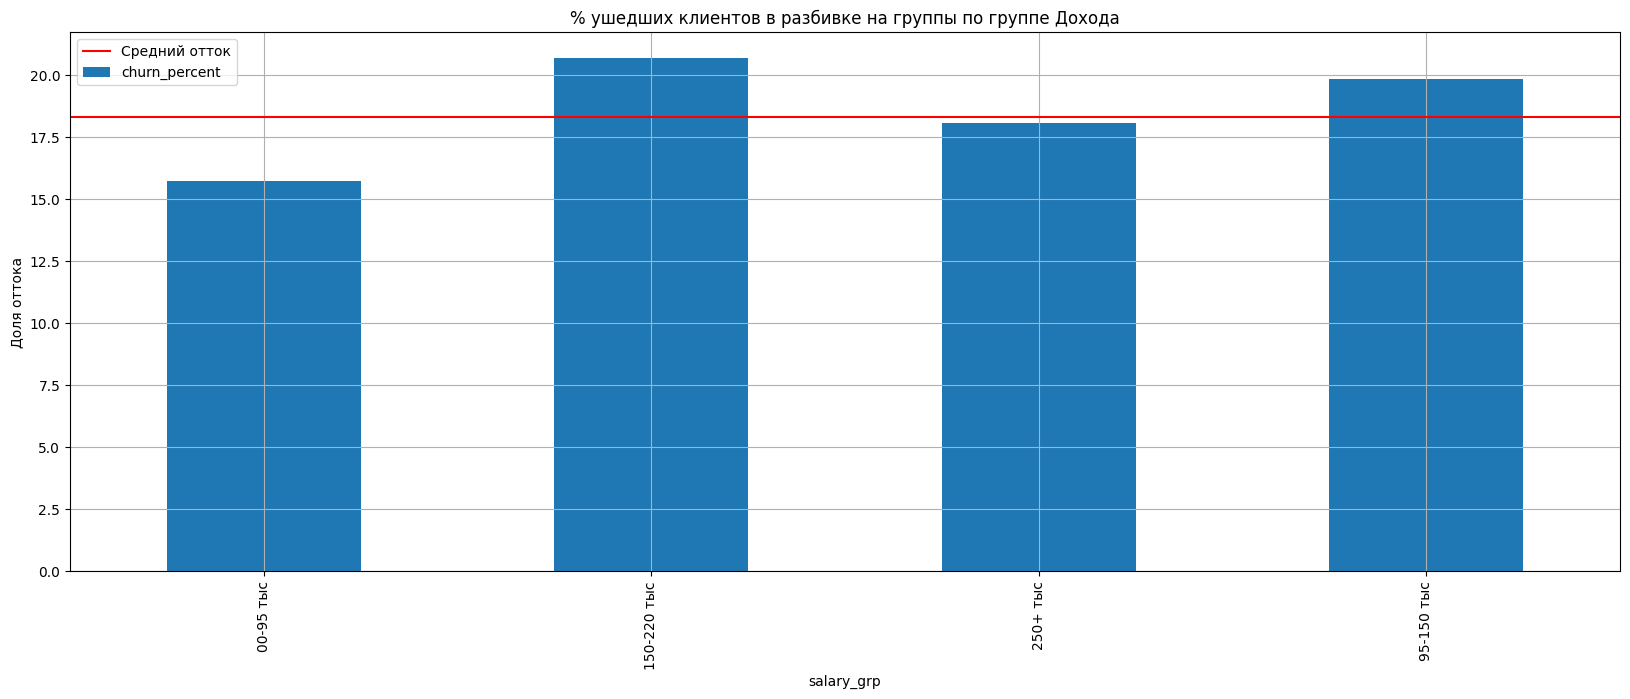

In [38]:
# Рассчитаем % ушедших клиентов в разбивке по ПОЛУ
df['salary_grp'] = df['est_salary'].apply(lambda x: '00-95 тыс' if x<95000
                                                else( '95-150 тыс' if x<150000
                                                 else( '150-220 тыс' if x<220000   
                                                 else '250+ тыс')))
group_churn = df.pivot_table (index = 'salary_grp', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке на группы по группе Дохода',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('Доля оттока')
plt.show()

Первоначальные наблюдения подтверждаются для диапазона дохода 95000 и меньше 220000 свойственен бОльший % оттока

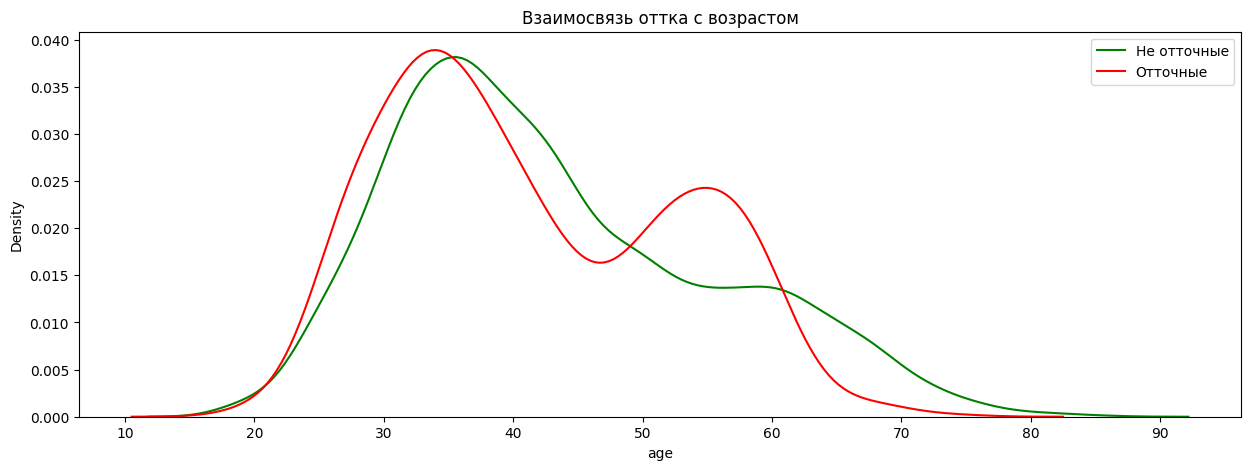

In [39]:
# визуализируем взаимосвязь оттока с возрастом.

plt.figure(figsize=(15,5))
sns.kdeplot(df[df['churn'] == 0]['age'], clip=(0, 3000000), common_norm=False, color='green')
sns.kdeplot(df[df['churn'] == 1]['age'], clip=(0, 3000000), common_norm=False, color='red')
plt.legend(['Не отточные', 'Отточные'])
plt.title('Взаимосвязь оттка с возрастом')
plt.show()

          sum count churn_percent
        churn churn              
age_grp                          
50-60     424  1557         27.23
25-35     575  2607         22.06
35-50     653  4150         15.73
0-25       31   235         13.19
60+ тыс   101  1194          8.46


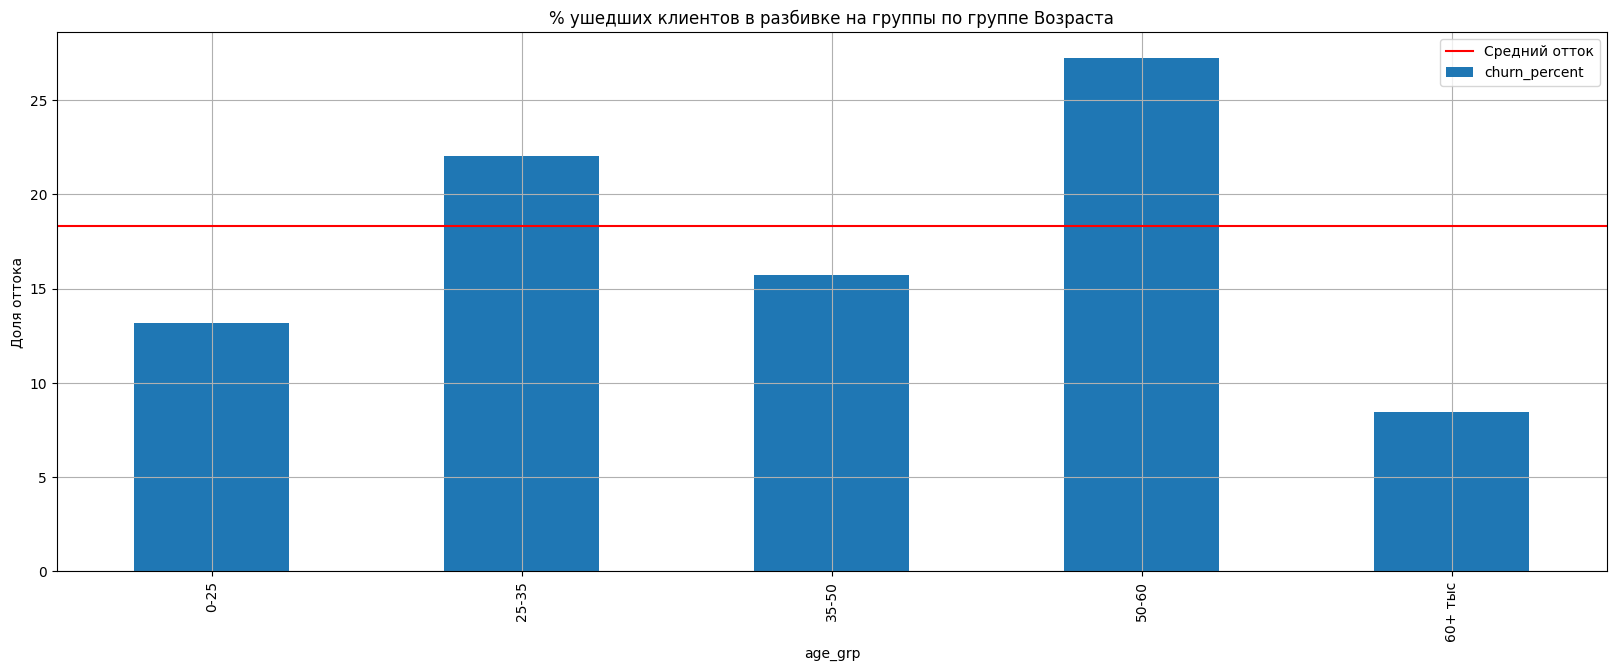

In [40]:
# Рассчитаем % ушедших клиентов в разбивке по ПОЛУ
df['age_grp'] = df['age'].apply(lambda x: '0-25' if x<25
                                                else( '25-35' if x<35
                                                 else( '35-50' if x<50   
                                                else( '50-60' if x<60 
                                                 else '60+ тыс'))))
group_churn = df.pivot_table (index = 'age_grp', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке на группы по группе Возраста',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('Доля оттока')
plt.show()

Вывод: Больший отток у клиентов в возрасте от 23 до 35 лет и от 50 до 60. 

Анализ оттока в разрезе категориальных переменных

         sum count churn_percent
       churn churn              
gender                          
М       1155  4860         23.77
Ж        629  4883         12.88


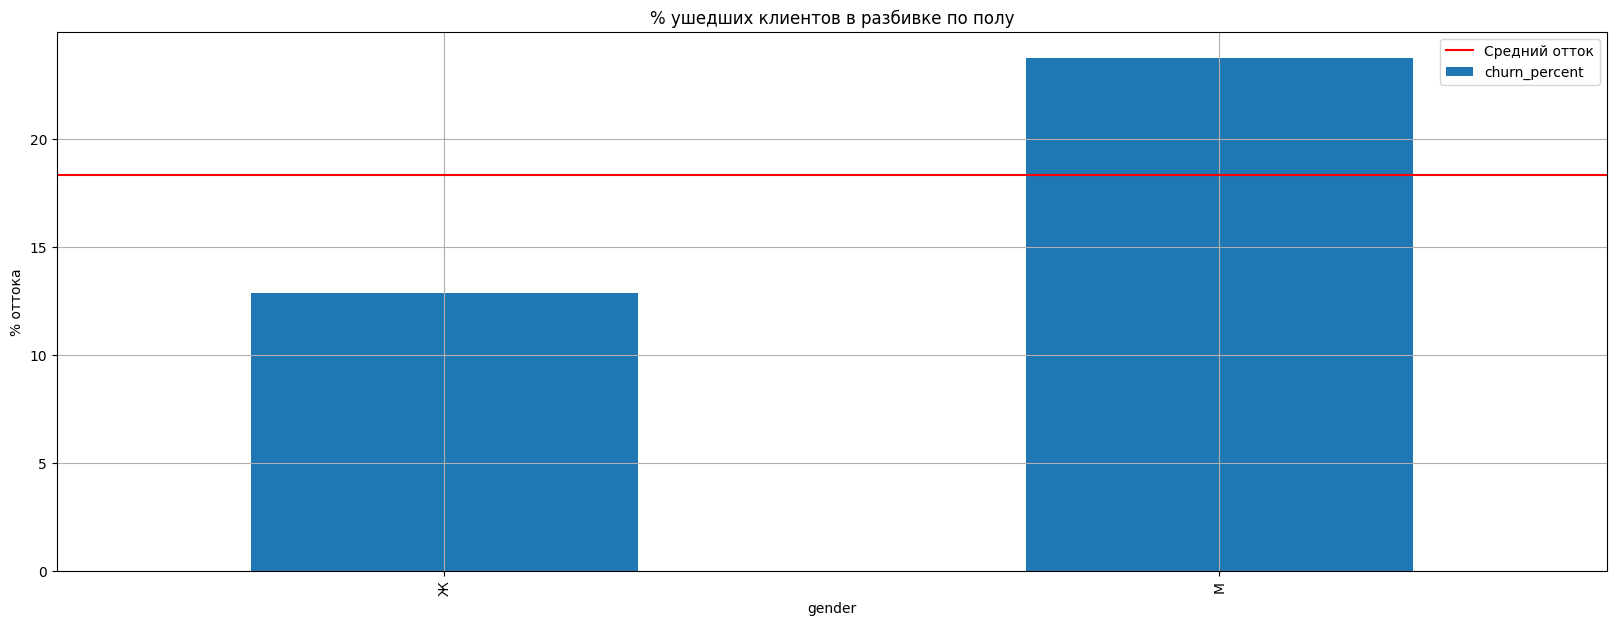

In [41]:
# Рассчитаем % ушедших клиентов в разбивке по ПОЛУ
group_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке по полу',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: Среди отточных клиентов больше мужчин. 

              sum count churn_percent
            churn churn              
credit_card                          
0             799  3133         25.50
1             985  6610         14.90


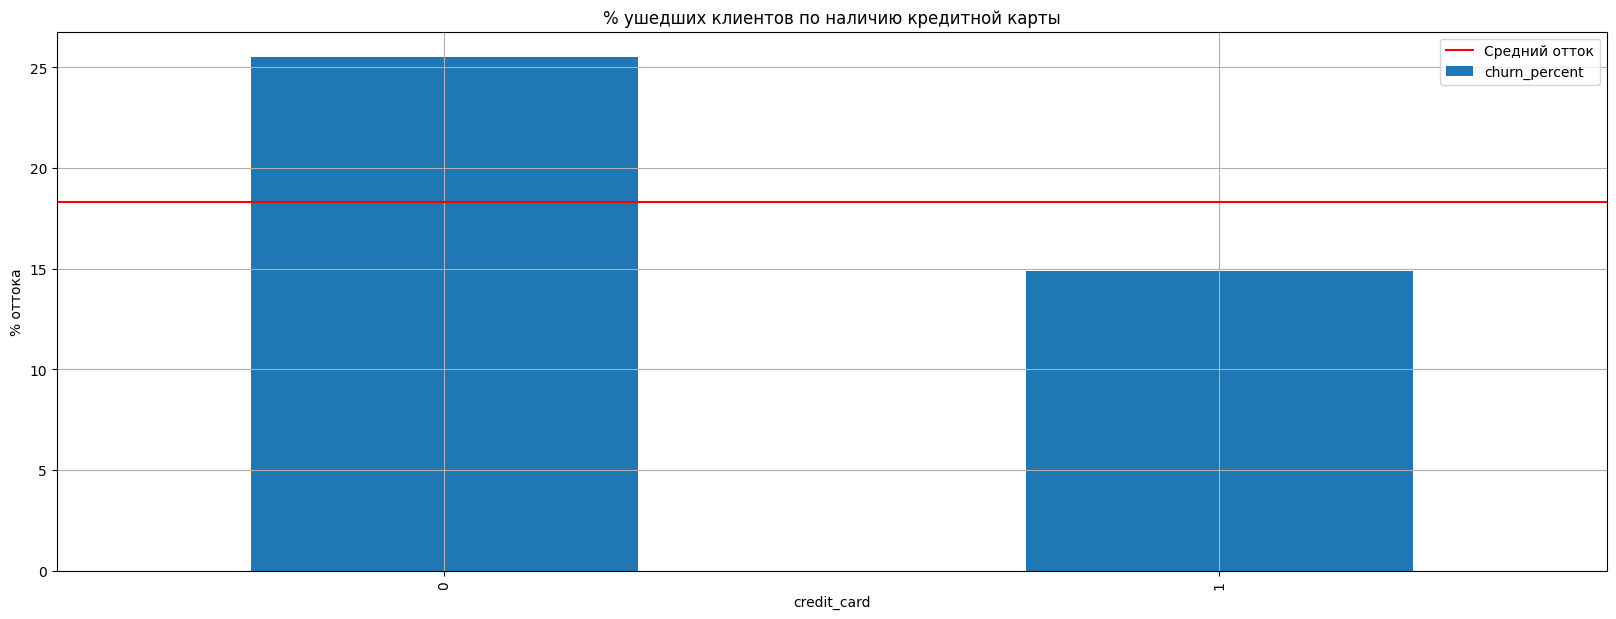

In [42]:
# Рассчитаем % ушедших клиентов в разбивке по НАЛИЧИЮ КРЕДИТНОЙ КАРТЫ
group_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов по наличию кредитной карты',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: Среди отточных клиентов больше клиентов без кредитной карты.

                sum count churn_percent
              churn churn              
last_activity                          
1              1245  5085         24.48
0               539  4658         11.57


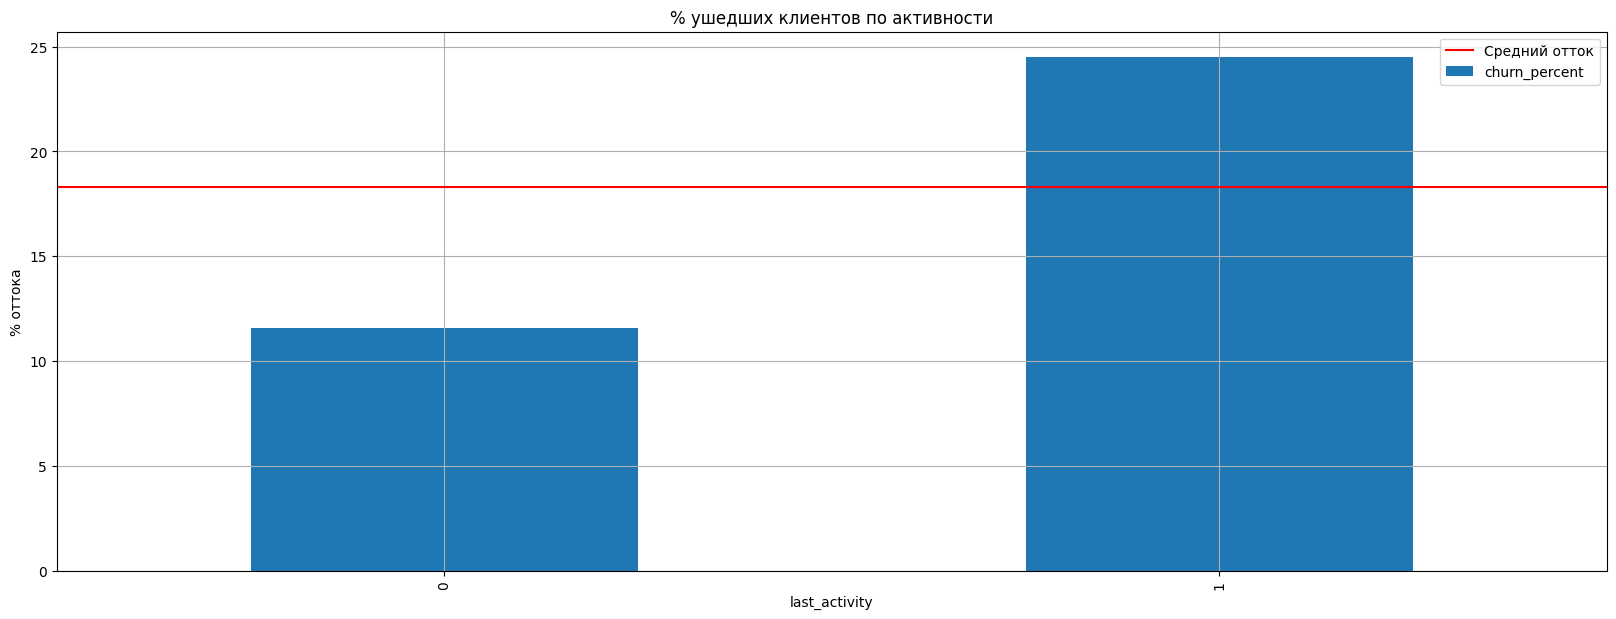

In [43]:
# Рассчитаем % ушедших клиентов в разбивке по АКТИВНОСТИ
group_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc =['sum', 'count'])
group_churn['churn_percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='churn_percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['churn_percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов по активности',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: Среди отточных клиентов больше активных клиентов.

            sum count percent
          churn churn        
city                         
Ярославль  1085  5682   19.10
Ростов      265  1416   18.71
Рыбинск     434  2645   16.41


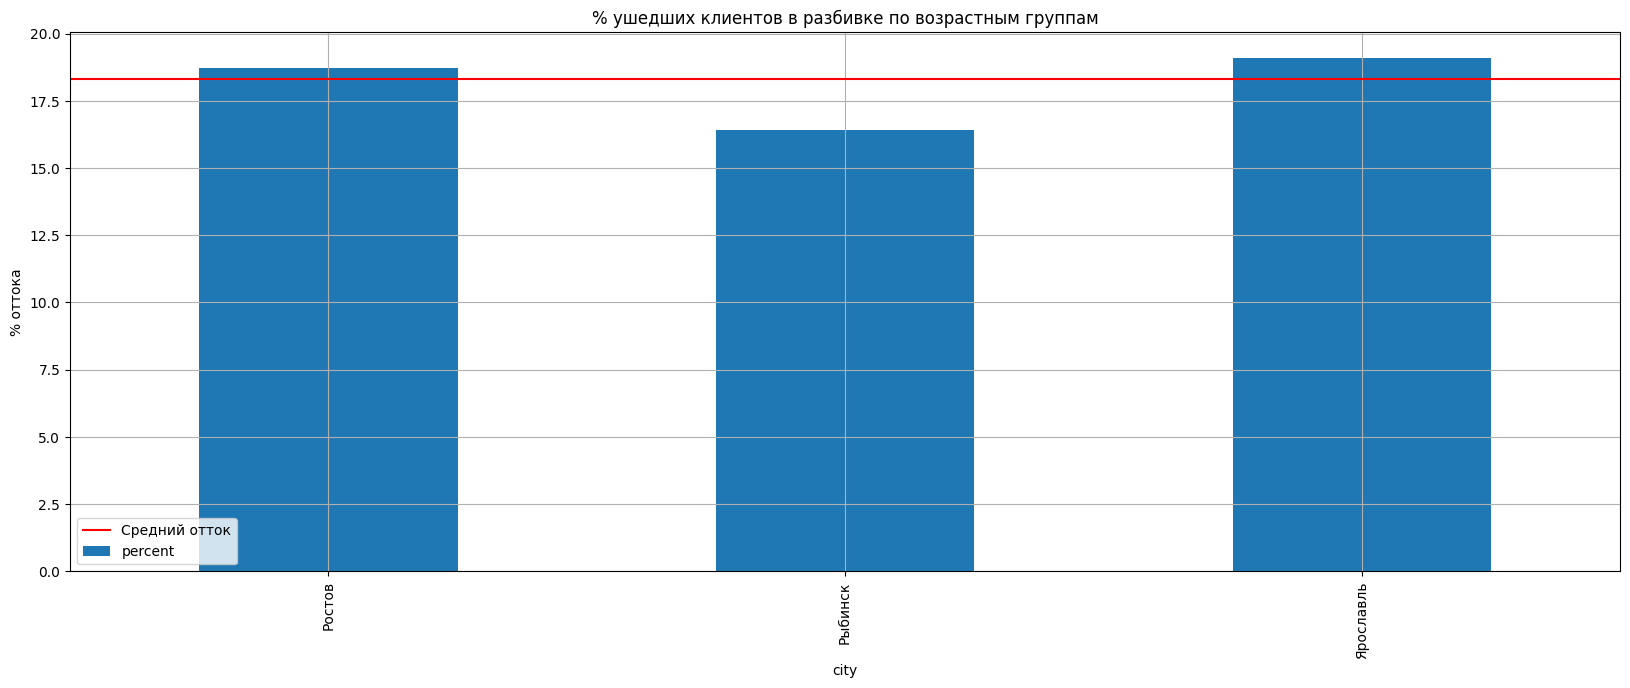

In [44]:
# Рассчитаем % ушедших клиентов в разбивке по возрастным группам
group_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
group_churn['percent'] = group_churn['sum']/group_churn['count']*100.0

print(group_churn.sort_values(by='percent', ascending=False).head(10).round(2))


# Построим диаграмму
group_churn['percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке по возрастным группам',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: Отток по городам(Ростов, Ярославль) не превышает 1 % от общего оттока, что нагодится на уровне погрешности. 

         sum count percent
       churn churn        
equity                    
9          7    13   53.85
7         36    79   45.57
6         58   160   36.25
8          6    17   35.29
5        557  1873   29.74
4        458  1825   25.10
3        315  1528   20.62
2        166  1048   15.84
1         93   764   12.17
0         88  2436    3.61


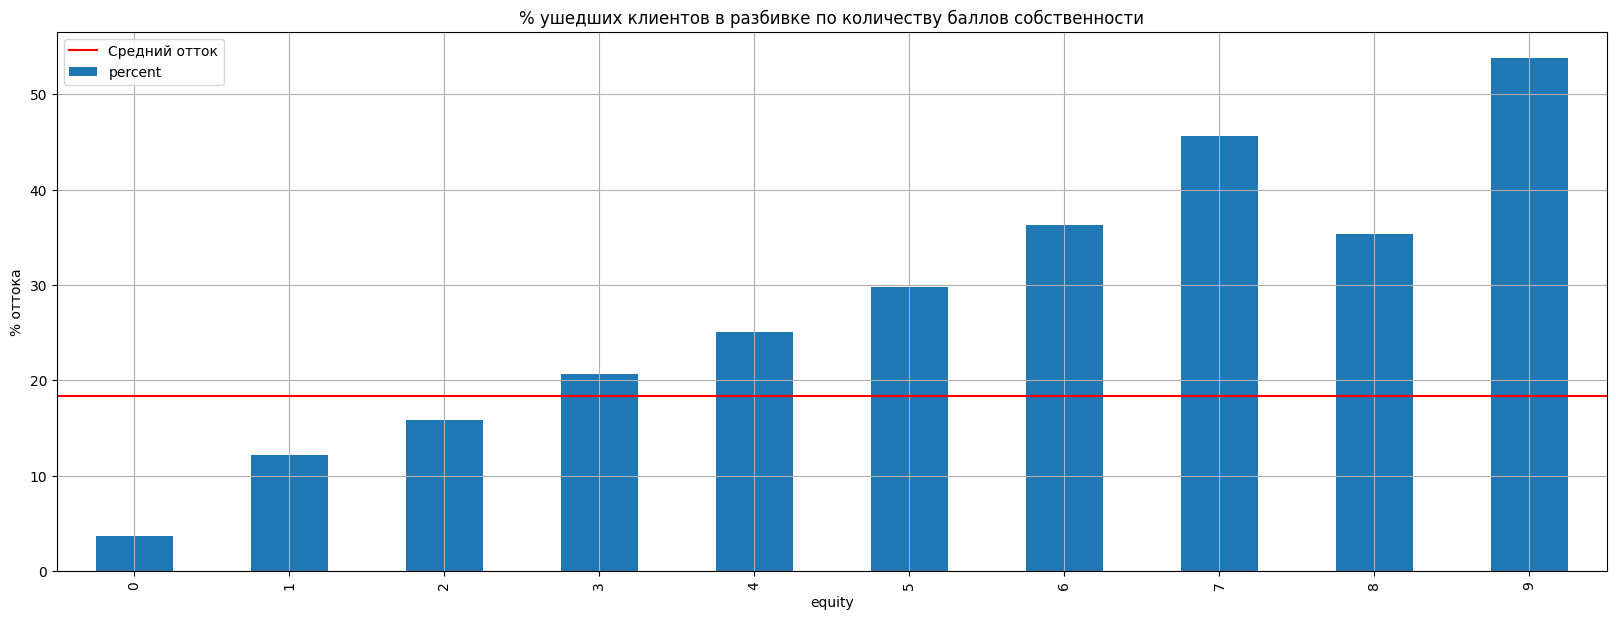

In [45]:
# Рассчитаем % ушедших клиентов в разбивке по количеству баллов собственности

equity_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc =['sum', 'count'])
equity_churn['percent'] = equity_churn['sum']/equity_churn['count']*100

print(equity_churn.sort_values(by='percent', ascending=False).head(10).round(2))

# Построим диаграмму

equity_churn['percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке по количеству баллов собственности',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: По диаграмме видна практически прямая зависимость % ушедших клиентов от баллом собственности.

           sum count percent
         churn churn        
products                    
4          292   464   62.93
5            8    19   42.11
3          292  1023   28.54
2          962  5043   19.08
1          230  3194    7.20


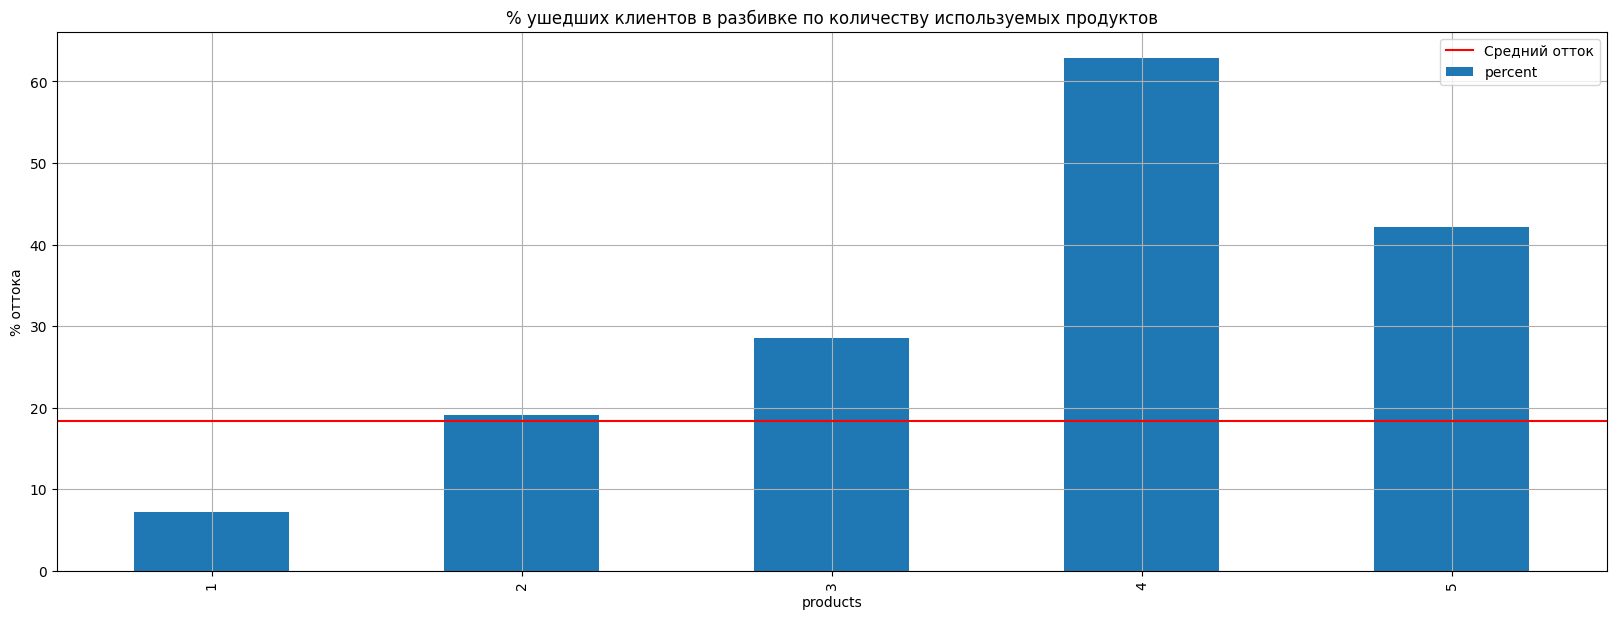

In [46]:
# Рассчитаем % ушедших клиентов в разбивке по количеству используемых продуктов.

products_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc =['sum', 'count'])
products_churn['percent'] = products_churn['sum']/products_churn['count']*100

print(products_churn.sort_values(by='percent', ascending=False).head(10).round(2))

# Построим диаграмму

products_churn['percent'].plot( kind='bar', 
                         figsize=(20, 7),
                         title='% ушедших клиентов в разбивке по количеству используемых продуктов',
                         grid=True)
plt.axhline(y=df.churn.mean()*100, color='r', label='Средний отток')
plt.legend()
plt.ylabel('% оттока')
plt.show()

Вывод: Высокий % оттока у клиентов использующих 3 и более продуктов.

#### Формирование портретов клиентов, которые склонны и не склонны уходу.

In [47]:
#Сформируем потрет отточных/не отточных клиентов
# по бинарным признакам смотрим среднее для получения доли. Для категориальных - смотрим наиболее частое значение.
agg_dict = {'score': 'mean'
            , 'city': pd.Series.mode
            , 'gender':pd.Series.mode
            , 'age':'mean'
            , 'equity':'mean'
            , 'balance':'mean'
            , 'products':'mean'
            , 'credit_card':'mean'
            , 'last_activity':'mean'
            , 'est_salary':'mean'}
pd.set_option("display.float_format", "{:.1f}".format)
pvt = pd.pivot_table(df, columns=['churn'], aggfunc=agg_dict)
res_lst = []
for i in range(len(pvt_temp)):
    if type(pvt_temp.iloc[i][0])==str:
        res_lst.append(0)
    else:
        res_lst.append(round((pvt_temp.iloc[i][1]/pvt_temp.iloc[i][0]-1)*100,1))
pvt_temp['delta_prcnt'] = res_lst
pvt_temp

is_null_column,0,1,delta_prcnt
age,42.9,42.1,-1.9
churn,0.2,0.0,-97.6
city,Ярославль,Ярославль,0.0
credit_card,0.6,0.8,27.4
equity,3.4,0.1,-98.5
est_salary,124501.9,226310.2,81.8
gender,Ж,М,0.0
last_activity,0.5,0.5,6.5
products,2.1,1.2,-44.2
score,843.7,865.4,2.6


С учётом проведённого анализа и можем сформировать потрет **отточного** клиента:

Это в большинстве случаев Мужина, довольно состоятельный (высокий баланс и доход, много собсвтенности). Имеет средний кредитный рейтинг. Не использует кредитную карту, но активен в банке и  пользуется довольно большим числом продуктов. Незначительно чаще проживает в Ярославле и Ростове

    1. Средний кредитный скор лежит в диапазоне от 820 до 940 баллов
    4. В большинстве случаев мужчина
    5. С большой долей вероятности НЕ имеет банковскую карту
    6. В возрасте от 25 до 35 или от 60 лет.
    7. Значительно более активный 
    8. баллов собственности от 3 включительно
    9. продуктов от 3 включительно
    10. Незначительно, но чаще проживает в Ростове или Ярославле

С учётом проведённого анализа и можем сформировать потрет **НЕотточного** клиента:

Это в большинстве случаев Женщина, низкая и средняя состоятельность. Кредитный рейтинг может быть как высоким, так и дволььно низким. Часто имеет кредитную карт карту, но не очень активен в банке и  пользуется довольно малым числом продуктов. Незначительно чаще проживает в Рыбинске

    1. Имеет кредитный скоринг до 820  или выше  940 баллов
    2. Чаще всего на балансе хранит до 800 тыс
    3. Имеет доход до 95 тысяч
    4. В большинстве своём женщина
    5. Без кредитной карты
    6. Принадлежит возрастным группам до 25, 35-50 и 60+ лет
    7. Значительно менее активный в банке
    8. Имеет до 2х баллов собственности включительно
    9. Также имеет 2 и менее банковских продуктов
    10. Незначительно, но чаще проживает в Рыбинске

### Проверка гипотез

#### Проверка первой гипотезы

Гипотеза №1: о различие доходов оставшихся и отточных клиентов

H_0: доходы оставшихся и отточных клиентов равны.

H_1: доходы оставшихся и отточных клиентов не равны.

Для проверки гипотезы проведем t-test

alpha = 0.05 # критический уровень статистической значимости

Проверим условия применения t-тест:

    Выборки не зависят друг от друга 
считаем это условие выполненным исходя из  из описания датасета

    Выборочные средние нормально распределены 
  визуализация распределения показывает, что распределение точно не нормальное. Однако для проведения Т-теста это не обязательно условие. Достаточно нормального распределения выборочных средних. Поскольку наблюдений достаточно большое число и они независимы - считаем это условие выполненным
  
     Дисперсии рассматриваемых генеральных совокупностей равны.
  Так как разница в размере выбороко больше 25% воспользуемся equal_var=False в t-test
  
    Отсутствие явных выбросов, которые будут влиять на расчёт среднего.
  Наиболее явные выбросы обработали на предыдущих этапах с помощью z-test

In [48]:
(df['est_salary'].count() - df['est_salary'].nunique())*2

8

Всего 8 дублей по est_salary. Поэтому для оценки гипотезы применим ранговый критерий Манна-Уитни.

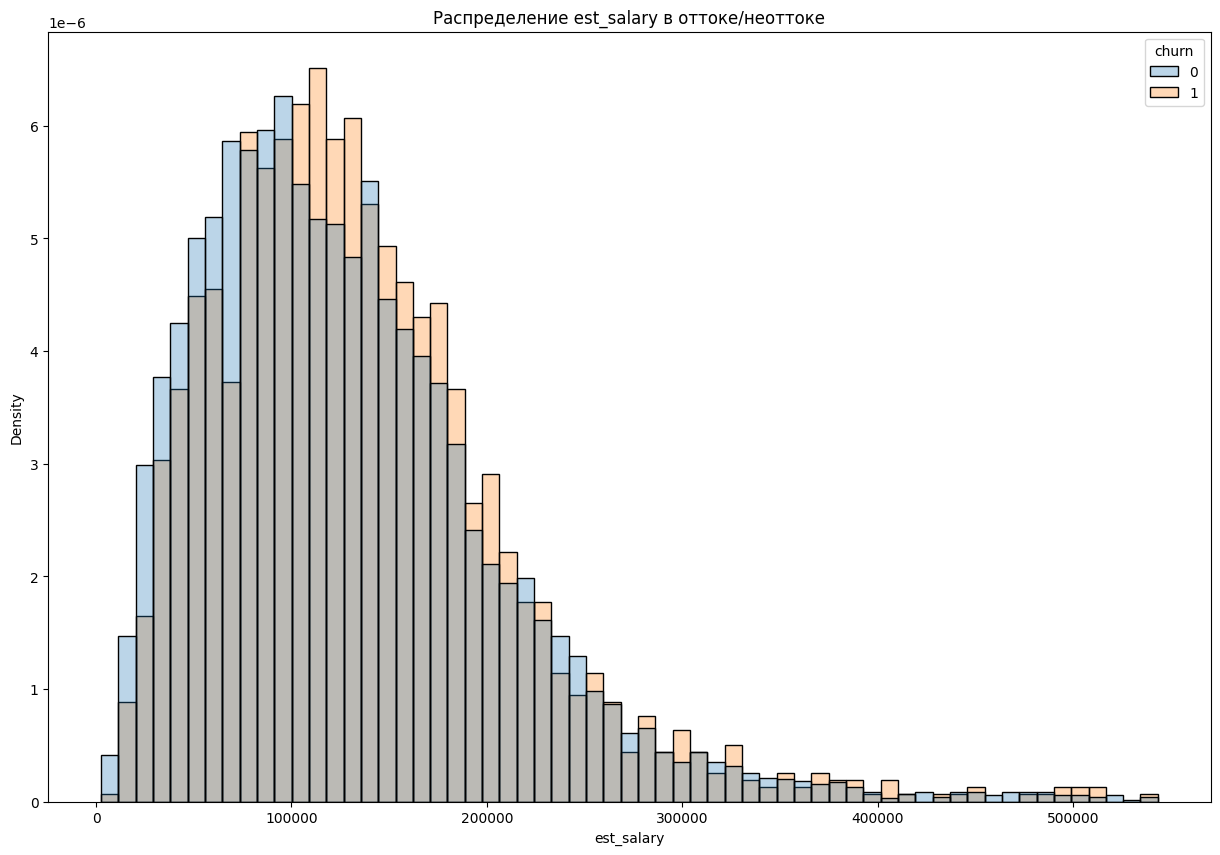

In [49]:
sns.histplot(data=df, x='est_salary', hue='churn', stat="density", common_norm=False, alpha = 0.3)
plt.title('Распределение est_salary в оттоке/неоттоке')
plt.show()

H0: Распределение доходов в двух выборках (отток/не отток) принадлежат нормальному распределению

H1: Распределение доходов в двух выборках (отток/не отток) отлично от нормального

In [50]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости
shapiro_test_stat, p_value = st.shapiro(df[df['churn']==1]['est_salary'])
print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')   

p-значение:  4.226047388268337e-30
Распределение не нормально


In [51]:
# проведём тест на соотвествие данных о доходах оставшихся клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости
shapiro_test_stat, p_value = st.shapiro(df[df['churn']==0]['est_salary'])
print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  0.0
Распределение не нормально


c:\Users\10858\anaconda3\envs\practicum\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
# проведем u-test
alpha = 0.05  

stat, pvalue = st.mannwhitneyu(
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'])

print('p-значение: ', pvalue)

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: выборки не из одной ген. совокупности')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  8.464217733568922e-06
Отвергаем нулевую гипотезу: выборки не из одной ген. совокупности


Вывод: Отвергаем нулевую гипотезу, доходы оставшихся и отточных клиентов не равны.

#### Проверка второй гипотезы

Гипотеза №2: различие в наличии или отсутствии кредитной карты

H0: доля клиентов с кредитной картой у оставшихся и отточных равны

H1: доля клиентов с кредитной картой у оставшихся и отточных не равны

Выборки являются набором бинарных значений, поэтому t-test, применять нельзя. Сравнение средних не даст корректного результата. Используем тест пропорций

In [53]:
# проведем u-test

a = df[df['churn'] == 1]['credit_card']
b = df[df['churn'] == 0]['credit_card']



alpha = 0.05  
count = np.array([a.sum(), b.sum()])
nobs = np.array([len(a), len(b)])
z_stat, pvalue = proportions_ztest(count, nobs)

print('p-значение: ', pvalue)

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: выборки не из одной ген. совокупности')
else:
    print('Не получилось отвергнуть нулевую гипотезу')    

p-значение:  1.3172863013513461e-36
Отвергаем нулевую гипотезу: выборки не из одной ген. совокупности


Вывод: Проведенный тест показал, что доля кредитных карт у отточников и оставшихся клиентов значимо различается

### Промежуточный вывод.

Основные признаки отточных клиентов: 


    1. баллы кредитного скоринга  от 820 до 940
    2. баланс от 800000
    3. оценочный доход от 95000
    4. Мужчины
    5. Без кредитной карты
    6. Возрастная группа '25-35' и '50-60'
    7. Активные
    8. баллов собственности от 3 включительно
    9. продуктов от 3 включительно

Так же были подтверждены признаки отточных клиентов путем проверки гипотез: доходы оставшихся и отточных клиентов не равны, количество кредитных карт у оставшихся и отточных не равны.

### Сегментация и приоритезация сегментов.

#### Сегментация.

***Сегмент №1*** - Бережливые возрастные клиенты

    Возраст: 50-60
    Баланс: от 800 тыс.

In [54]:
count_1 = df.query ('age>=50 and age<=60 and balance>=800000')
count_churn_1 = count_1.query ('churn==1')
percent_1 =  round((len(count_churn_1)/len(count_1))*100,2)
print('Число пользователей в сегменте:', len(count_1))
print('Число отточных пользователей в сегменте:', len(count_churn_1))
print('% отточных пользователей в сегменте:', percent_1)

Число пользователей в сегменте: 563
Число отточных пользователей в сегменте: 253
% отточных пользователей в сегменте: 44.94


***Сегмент №2*** - активные молодые мужчины

    Пол: Мужской
    Возраст: 25-35
    Наличие кредитной карты: нет
    Пользовательская активность: да

In [55]:
count_2 = df.query ('man==1 and age>=25 and age<=35 and last_activity==1')
count_churn_2 = count_2.query ('churn==1')
percent_2 =  round((len(count_churn_2)/len(count_2))*100,2)
print('Число пользователей в сегменте:', len(count_2))
print('Число отточных пользователей в сегменте:', len(count_churn_2))
print('% отточных пользователей в сегменте:', percent_2)

Число пользователей в сегменте: 939
Число отточных пользователей в сегменте: 322
% отточных пользователей в сегменте: 34.29


**Сегмент №3** - состоятельные взрослые мужчины

    Пол: мужской
    Возраст: 35-60
    Наличие кредитной карты: да
    Доход: от 95 тыс

In [56]:
count_3 = df.query ('man==1 and age>=35 and age<60 and credit_card==0 and est_salary>95000')
count_churn_3 = count_3.query ('churn==1')
percent_3 =  round((len(count_churn_3)/len(count_3))*100,2)
print('Число пользователей в сегменте:', len(count_3))
print('Число отточных пользователей в сегменте:', len(count_churn_3))
print('% отточных пользователей в сегменте:', percent_3)

Число пользователей в сегменте: 633
Число отточных пользователей в сегменте: 214
% отточных пользователей в сегменте: 33.81


In [57]:
df.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,Ростов,Рыбинск,Ярославль,woman,man,score_grp,balance_grp,salary_grp,age_grp
0,183012,850,Рыбинск,Ж,25.0,1,59214.8,2,0,1,...,1,0,1,0,1,0,820-940,0000-200 тыс,00-95 тыс,25-35
1,146556,861,Рыбинск,Ж,37.0,5,850594.3,3,1,0,...,0,0,1,0,1,0,820-940,0800-1100 тыс,00-95 тыс,35-50


Сегмент №4 - Молодые активные женщины с капиталом

Пол: женский
Возраст: до 50
Скор: 820 - 940
Баллов собственности от 3
Активность = 1

In [58]:
count_4 = df.query ('woman==1 and age<50 and score>=820 and score<=940 and equity>=3 and last_activity==1')
count_churn_4 = count_4.query ('churn==1')
percent_4 =  round((len(count_churn_4)/len(count_4))*100,2)
print('Число пользователей в сегменте:', len(count_4))
print('Число отточных пользователей в сегменте:', len(count_churn_4))
print('% отточных пользователей в сегменте:', percent_4)

Число пользователей в сегменте: 625
Число отточных пользователей в сегменте: 274
% отточных пользователей в сегменте: 43.84


#### Приоритизация сегментов


Расположим сегменты в порядке убывания количества отточников:

**Сегмент №2** - активные молодые мужчины

    Пол: Мужской
    Возраст: 25-35
    Наличие кредитной карты: нет
    Пользовательская активность: да
    Число пользователей в сегменте: 935
    Число отточных пользователей в сегменте: 322
    % отточных пользователей в сегменте: 34.44

**Сегмент №4** - Молодые женщины с капиталом

    Пол: женский
    Возраст: до 50
    Скор: 840 - 920
    Баллов собственности от 3
    Активность = 1

    Число пользователей в сегменте: 623
    Число отточных пользователей в сегменте: 274
    % отточных пользователей в сегменте: 43.98

**Сегмент №1** - Бережливые возрастные клиенты

    Возраст: 50-60
    Баланс: от 800 тыс.

    Число пользователей в сегменте: 562
    Число отточных пользователей в сегменте: 253
    % отточных пользователей в сегменте: 45.02


**Сегмент №3** - состоятельные взрослые мужчины

    Пол: мужской
    Возраст: 35-60
    Наличие кредитной карты: да
    Доход: от 95 тыс
    
    Число пользователей в сегменте: 630
    Число отточных пользователей в сегменте: 214
    % отточных пользователей в сегменте: 33.97    

### Рекомендации

Сегмент №2 - активные молодые мужчины:

    - предложить кредитную карту
    - Повышенный кэшбек в магазинах стрительных материалов
    - Повышенный кэшбек в магазинах одежды
    - Льготный автокредит при оформлении кредитной карты
Сегмент №4 - Молодые женщины с капиталом

    - Повышенный кэшбек в магазинах мебели и товаров для дома
    - Повышенный кэшбек в магазинах одежды    
    - продвижение сервисов по оплате коммунальных услуг        
Сегмент №1 - Бережливые возрастные клиенты

    - предложение программ с повышенными ставками по вкладам
    - продвижение сервисов по оплате коммунальных услуг

Сегмент №3 - состоятельные взрослые мужчины

    - Повышенный кэшбек в автомагазинах
    - Реклама сервиса инвестиций

https://disk.yandex.ru/i/igwb0W9QgUhK9g